In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yaml

# Visualização arquivo yaml

In [3]:
metadados = yaml.load(open('metadata.yaml', 'r'))
metadados

<ipython-input-3-c73b7db7ee3a>:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  metadados = yaml.load(open('metadata.yaml', 'r'))


{'dataset': 'adult',
 'description': 'Prediction of whether a person makes over $50K a year, based on 14 other features.',
 'source': 'http://mlr.cs.umass.edu/ml/datasets/Adult https://www.openml.org/d/1590\n',
 'publication': 'Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid",  Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996\n',
 'task': 'classification',
 'keywords': ['income', 'demographics'],
 'target': {'type': 'binary',
  'description': 'If a given adult makes over $50K a year',
  'code': "'<=50K' = 1,  '>50K' = 0\n"},
 'features': [{'name': 'age',
   'type': 'continuous',
   'description': 'age of adults'},
  {'name': 'workclass',
   'type': 'categorical',
   'description': 'working class (mostly between government or self employed)',
   'code': "'?' = 0,  'Federal-gov' = 1,  'Local-gov' = 2,  'Never-worked' = 3,  'Private' = 4,  'Self-emp-inc' = 5,  'Self-emp-not-inc' = 6,  'State-gov' = 7,  

In [4]:
metadados.keys()

dict_keys(['dataset', 'description', 'source', 'publication', 'task', 'keywords', 'target', 'features'])

In [5]:
print(metadados['dataset'])
print('---------------------------')
print(metadados['description'])
print('---------------------------')
print(metadados['source'])
print('---------------------------')
print(metadados['publication'])
print('---------------------------')
print(metadados['task'])

adult
---------------------------
Prediction of whether a person makes over $50K a year, based on 14 other features.
---------------------------
http://mlr.cs.umass.edu/ml/datasets/Adult https://www.openml.org/d/1590

---------------------------
Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid",  Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996

---------------------------
classification


In [6]:
for var_dic in metadados['features']:
    print(f'{var_dic["name"]:20s} : {var_dic["description"]}')
    if var_dic["type"] == 'categorical':
        depara = var_dic['code']
        # split: transforma a string em uma lista, com um elemento novo toda vez que ele encontra uma vírgula
        for val in depara.split(','):
            # strip: remove espaços no começo ou no final da string
            print(f'\t{val.strip()}')
            
    print('-------------------------------------------------------------------------')

age                  : age of adults
-------------------------------------------------------------------------
workclass            : working class (mostly between government or self employed)
	'?' = 0
	'Federal-gov' = 1
	'Local-gov' = 2
	'Never-worked' = 3
	'Private' = 4
	'Self-emp-inc' = 5
	'Self-emp-not-inc' = 6
	'State-gov' = 7
	'Without-pay' = 8
-------------------------------------------------------------------------
fnlwgt               : population totals, weighted according to many parameters, including race, sex, and age (see openML page under Variable Description for more details)

-------------------------------------------------------------------------
education            : education level of adult
-------------------------------------------------------------------------
education-num        : Grade number of education level
-------------------------------------------------------------------------
marital-status       : Marital status of adult
	'Divorced' = 0
	'Married-AF

# Definição e explicação do modelo

## Modelo:
- Governo quer **classificar se uma pessoa recebe mais de R$50.000/ano** a partir de variáveis demográficas.
- Modelo deve ser **explicativo**.

### Apesar dos metadados não explicarem o propósito do modelo, podemos levantar hipóteses do propósito de nosso estudo:
- Qual é a população mais prejudicada financeiramente no meu conjunto?
- Como otimizar políticas para reduzir as desigualdades?
- Como melhor entender minorias?
- Como entender a população para planejamento de trânsito e mobilidade urbana (horas de trabalho, possibilidade de carro próprio ou uso de transporte público e estado civil/tem filhos)?

### Queremos saber **quais features são mais significativas** para minha variável resposta.
Portanto, usaremos um modelo de árvore de decisão, para que possamos **medir gini/entropia de cada variável**

# Leitura dos dados

In [7]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,1
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39,1
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39,1
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39,1
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,4,215419.0,9,13.0,0,10,1,4,0,0.0,0.0,36.0,39,1
48838,64.0,0,321403.0,11,9.0,6,0,2,2,1,0.0,0.0,40.0,39,1
48839,38.0,4,374983.0,9,13.0,2,10,0,4,1,0.0,0.0,50.0,39,1
48840,44.0,4,83891.0,9,13.0,0,1,3,1,1,5455.0,0.0,40.0,39,1


# Análise preliminar

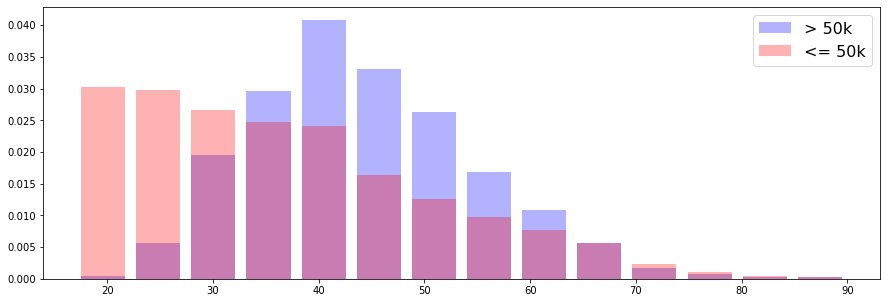

In [8]:
plt.figure(figsize=(15,5))

minimo = df.age.min()
maximo = df.age.max()
nbins=15
bins = np.linspace(minimo,maximo,nbins)

plt.hist(df.loc[df.target==0].age, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='> 50k')
plt.hist(df.loc[df.target==1].age, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='<= 50k')

plt.legend(fontsize=16)

## Podemos observar que:
### - Pessoas mais novas tendem a ter uma renda menor;
### - Pessoas que têm entre 35 e 55 anos, em sua maioria, possuem uma renda maior que 50.000. 
### - Pessoas que têm mais de 55 anos tendem a ter uma proporção semelhante entre renda > 50k e renda <= 50k, provavelmente por conta do plano de aposentadoria. 

In [9]:
df.workclass.value_counts(dropna=False,normalize=True)

4    0.694198
6    0.079071
2    0.064207
0    0.057307
7    0.040559
5    0.034704
1    0.029319
8    0.000430
3    0.000205
Name: workclass, dtype: float64

## Quase 70% da nossa base trabalha no setor privado

In [13]:
# Contagem absoluta de cada categoria
cnt_0 = df.loc[df.target==0].workclass.value_counts(dropna=False)
cnt_1 = df.loc[df.target==1].workclass.value_counts(dropna=False)

# Juntando em uma tabela
pd.concat([cnt_0.rename('> 50k'),cnt_1.rename('<= 50k')],axis=1).fillna(0)

,> 50k,<= 50k
0,265.0,2534
1,561.0,871
2,927.0,2209
3,0.0,10
4,7387.0,26519
5,938.0,757
6,1077.0,2785
7,530.0,1451
8,2.0,19


In [14]:
# Normalizando os dados
aux = pd.concat([cnt_0.rename('> 50k'),cnt_1.rename('<= 50k')],axis=1).fillna(0)

aux = aux.div(aux.sum(axis='columns'),axis='rows')
aux

,> 50k,<= 50k
0,0.094677,0.905323
1,0.391760,0.608240
2,0.295599,0.704401
3,0.000000,1.000000
4,0.217867,0.782133
5,0.553392,0.446608
6,0.278871,0.721129
7,0.267542,0.732458
8,0.095238,0.904762


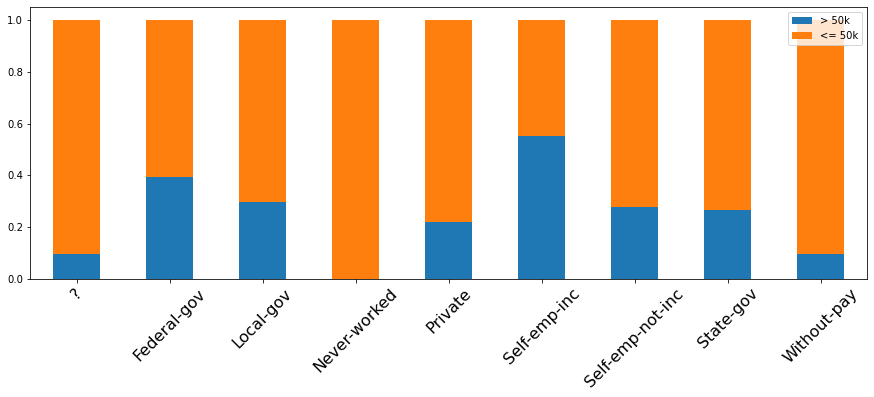

In [16]:
# Plotando o gráfico
plt.figure(figsize=(15,5))
ax = plt.subplot(1, 1, 1)
aux.plot(ax=ax, kind='bar', stacked=True)

de_para = [
    '?',
    'Federal-gov',
    'Local-gov',
    'Never-worked',
    'Private',
    'Self-emp-inc',
    'Self-emp-not-inc',
    'State-gov',
    'Without-pay',
]

plt.xticks([0,1,2,3,4,5,6,7,8],de_para,fontsize=16,rotation=45);

## Temos uma maior concentração de pessoas com renda maior de 50k para pessoas que têm uma empresa própria ou são funcionárias do governo federal

In [17]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,1
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39,1
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39,1
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39,1
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,4,215419.0,9,13.0,0,10,1,4,0,0.0,0.0,36.0,39,1
48838,64.0,0,321403.0,11,9.0,6,0,2,2,1,0.0,0.0,40.0,39,1
48839,38.0,4,374983.0,9,13.0,2,10,0,4,1,0.0,0.0,50.0,39,1
48840,44.0,4,83891.0,9,13.0,0,1,3,1,1,5455.0,0.0,40.0,39,1


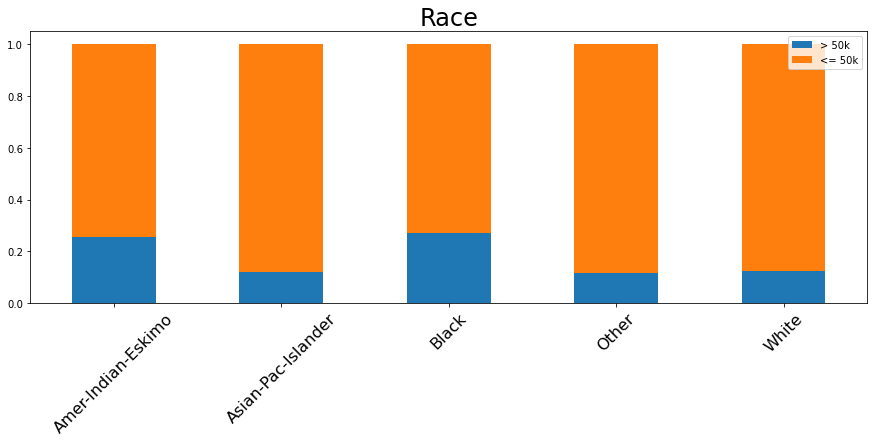

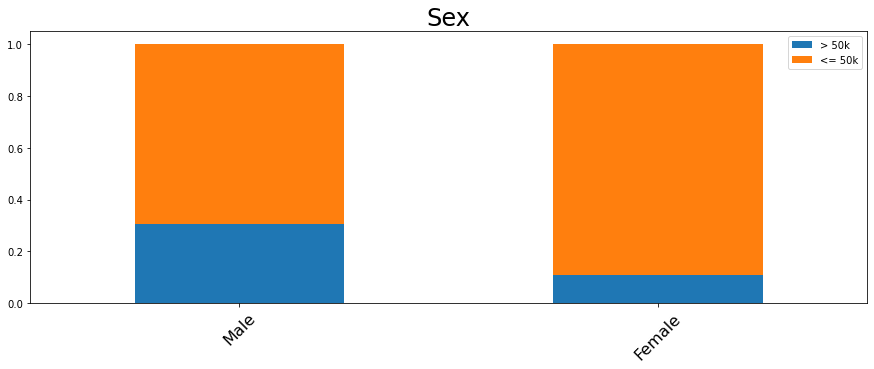

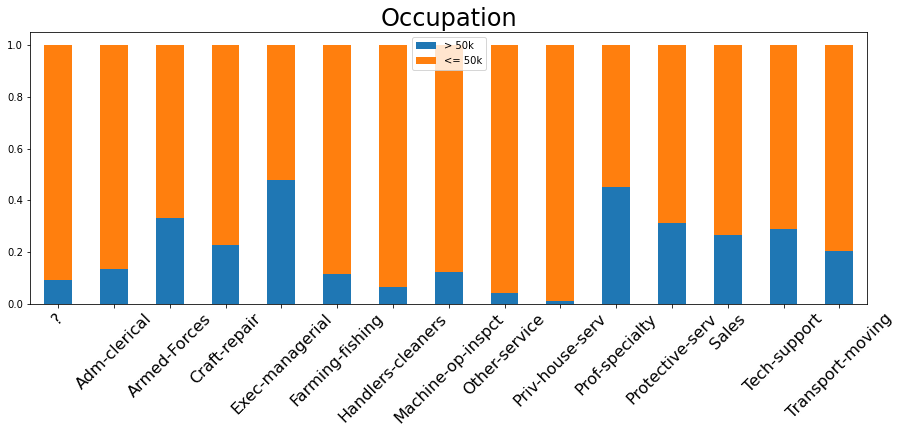

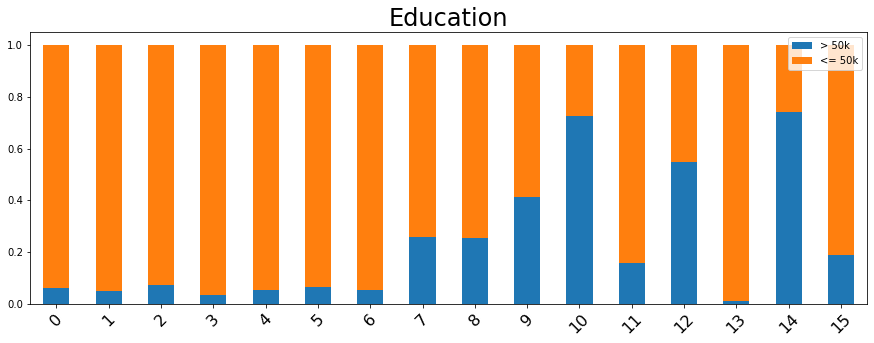

In [29]:
# Fazendo o mesmo gráfico para diversas variáveis

# Race
rcnt_0 = df.loc[df.target==0].race.value_counts(dropna=False)
rcnt_1 = df.loc[df.target==1].race.value_counts(dropna=False)
raux = pd.concat([rcnt_0.rename('> 50k'),rcnt_1.rename('<= 50k')],axis=1).fillna(0)
raux = raux.div(raux.sum(axis='columns'),axis='rows')
plt.figure(figsize=(15,5))
rax = plt.subplot(1, 1, 1)
raux.plot(ax=rax, kind='bar', stacked=True)
rde_para = [
    'Amer-Indian-Eskimo',
    'Asian-Pac-Islander',
    'Black',
    'Other',
    'White'
]
plt.xticks([0,1,2,3,4],rde_para,fontsize=16,rotation=45)
plt.title('Race', fontsize=24);

# Sex
scnt_0 = df.loc[df.target==0].sex.value_counts(dropna=False)
scnt_1 = df.loc[df.target==1].sex.value_counts(dropna=False)
saux = pd.concat([scnt_0.rename('> 50k'),scnt_1.rename('<= 50k')],axis=1).fillna(0)
saux = saux.div(saux.sum(axis='columns'),axis='rows')
plt.figure(figsize=(15,5))
sax = plt.subplot(1, 1, 1)
saux.plot(ax=sax, kind='bar', stacked=True)
sde_para = [
    'Male',
    'Female'
]
plt.xticks([0, 1],sde_para,fontsize=16,rotation=45)
plt.title('Sex', fontsize=24);

# Occupation
ocnt_0 = df.loc[df.target==0].occupation.value_counts(dropna=False)
ocnt_1 = df.loc[df.target==1].occupation.value_counts(dropna=False)
oaux = pd.concat([ocnt_0.rename('> 50k'),ocnt_1.rename('<= 50k')],axis=1).fillna(0)
oaux = oaux.div(oaux.sum(axis='columns'),axis='rows')
plt.figure(figsize=(15,5))
oax = plt.subplot(1, 1, 1)
oaux.plot(ax=oax, kind='bar', stacked=True)
ode_para = [
    '?',
    'Adm-clerical',
    'Armed-Forces',
    'Craft-repair',
    'Exec-managerial',
    'Farming-fishing',
    'Handlers-cleaners',
    'Machine-op-inspct',
    'Other-service',
    'Priv-house-serv',
    'Prof-specialty',
    'Protective-serv',
    'Sales',
    'Tech-support',
    'Transport-moving',
]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],ode_para,fontsize=16,rotation=45)
plt.title('Occupation', fontsize=24);

# Education
ecnt_0 = df.loc[df.target==0].education.value_counts(dropna=False)
ecnt_1 = df.loc[df.target==1].education.value_counts(dropna=False)
eaux = pd.concat([ecnt_0.rename('> 50k'),ecnt_1.rename('<= 50k')],axis=1).fillna(0)
eaux = eaux.div(eaux.sum(axis='columns'),axis='rows')
plt.figure(figsize=(15,5))
eax = plt.subplot(1, 1, 1)
eaux.plot(ax=eax, kind='bar', stacked=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], fontsize=16,rotation=45)
plt.title('Education', fontsize=24);

## Observações:
### - 'Sex': Homens têm, proporcionalmente, uma renda maior que a das mulheres (desigualdade salarial).
### - 'Race': Estranhamente, minorias raciais apresentaram uma renda maior que as maiorias (erro na classificação do banco de dados ou resultado de políticas inclusivas?).
### - 'Occupation': Como esperado, funcionários com trabalhos braçais apresentaram menor renda que os demais.
### - 'Education': Em sua maioria, o nível de educação refletiu bastante na renda da população. Entretanto, temos valores surpreendentes como aqueles classificados com educação 'nível' 11, 13 e 15. Dado que provavelmente poucas pessoas tiverram esse grau de educação, essas divergências foram uma coincidência? Ou uma falha na coleta de dados?

# Correlação de variáveis

- No modelo, **temos diversas variáveis que são correlacionadas** (por exemplo: 'Husband' com 'Male'), assim, devemos tomar cuidado com a correlação entre elas.
- Ainda, nosso modelo deve ser **interpretável**, portanto, é de extrema importância olhar para esse fator.

### Para cálculo da correlação de variáveis, foi usado o método Cramer-V
- Não é possível usar Pearson ou Spearman para variáveis categóricas
- Uma vez que não o conhecia, fui procurar na internet, no qual usei esse artigo: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [30]:
# Pegando as variáveis que fazem sentido serem ordenadas
df_cat = df[[
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'target'
]]

# Essa parte do código foi pega da internet
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

corr_cat = df_cat.corr(cramers_v)
corr_cat

,workclass,marital-status,occupation,relationship,race,sex,native-country,target
workclass,1.000000,0.084506,0.399724,0.099983,0.056883,0.151246,0.031524,0.181151
marital-status,0.084506,1.000000,0.130568,0.488059,0.082269,0.459324,0.059368,0.448170
occupation,0.399724,0.130568,1.000000,0.177452,0.077071,0.423881,0.062412,0.349594
relationship,0.099983,0.488059,0.177452,1.000000,0.096989,0.646470,0.073841,0.454379
race,0.056883,0.082269,0.077071,0.096989,1.000000,0.113610,0.400618,0.099447
sex,0.151246,0.459324,0.423881,0.646470,0.113610,1.000000,0.053762,0.214532
native-country,0.031524,0.059368,0.062412,0.073841,0.400618,0.053762,1.000000,0.091759
target,0.181151,0.448170,0.349594,0.454379,0.099447,0.214532,0.091759,1.000000


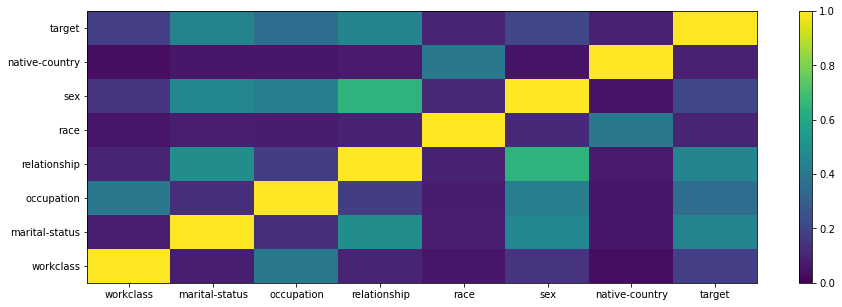

In [31]:
plt.figure(figsize=(15,5))
plt.pcolormesh(corr_cat.index, corr_cat.columns, corr_cat, vmin=0, vmax=1, shading='nearest')
plt.colorbar()

### Podemos ver que 'relationship' e 'sex' têm grande correlação, como previamente dito. Outras variáveis que apresentaram correlação, em menor escala:
- 'sex' com 'occupation'.
- 'relationship' e 'marital-status', como esperado.
- 'relationship', 'occupation' e 'marital-status' com a variável resposta 'target'.

In [32]:
# Agora para as variáveis numéricas
df_num = df[[
    'age',
    'fnlwgt',
    'education',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'target'
]]
corr_num = df_num.corr(method='pearson')
corr_num

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,target
age,1.000000,-0.076628,-0.015058,0.030940,0.077229,0.056944,0.071558,-0.230369
fnlwgt,-0.076628,1.000000,-0.022570,-0.038761,-0.003706,-0.004366,-0.013519,0.006339
education,-0.015058,-0.022570,1.000000,0.359668,0.028928,0.017638,0.057659,-0.080091
education-num,0.030940,-0.038761,0.359668,1.000000,0.125146,0.080972,0.143689,-0.332613
capital-gain,0.077229,-0.003706,0.028928,0.125146,1.000000,-0.031441,0.082157,-0.223013
capital-loss,0.056944,-0.004366,0.017638,0.080972,-0.031441,1.000000,0.054467,-0.147554
hours-per-week,0.071558,-0.013519,0.057659,0.143689,0.082157,0.054467,1.000000,-0.227687
target,-0.230369,0.006339,-0.080091,-0.332613,-0.223013,-0.147554,-0.227687,1.000000


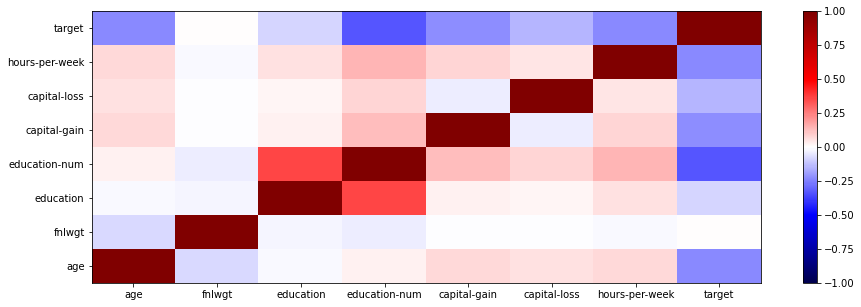

In [33]:
plt.figure(figsize=(15,5))
plt.pcolormesh(corr_num.index, corr_num.columns, corr_num, vmin=-1, vmax=1, shading='nearest', cmap='seismic')
plt.colorbar()

### Variáveis que apresentaram correlação:
- Variável resposta 'target' com 'age' e 'education-num', o que faz sentido.
- 'education' com 'education-num', como esperado.

# Modelagem

In [34]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,1
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39,1
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39,1
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39,1
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,4,215419.0,9,13.0,0,10,1,4,0,0.0,0.0,36.0,39,1
48838,64.0,0,321403.0,11,9.0,6,0,2,2,1,0.0,0.0,40.0,39,1
48839,38.0,4,374983.0,9,13.0,2,10,0,4,1,0.0,0.0,50.0,39,1
48840,44.0,4,83891.0,9,13.0,0,1,3,1,1,5455.0,0.0,40.0,39,1


In [36]:
X = df.drop(columns='target', axis=1)
y = df.target

from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=2021)

In [37]:
X_tr.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [38]:
X_ts.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

### Conjunto de dados não tem valores faltantes!

## Validação Cruzada

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512, 1028],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=2021),
                   params,
                   cv=5,
                   scoring='roc_auc',
                   verbose=5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1028]},
             scoring='roc_auc', verbose=5)

In [40]:
grid.fit(X_tr, y_tr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 2/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 3/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 4/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 5/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 1/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 2/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 3/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 4/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 5/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 1/5] END ..............criterion=gini, max_leaf_nodes=16; total time=   0.0s
[CV 2/5] END ..............criterion=gini, max_l

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1028]},
             scoring='roc_auc', verbose=5)

### Depois da validação cruzada, temos os parâmetros abaixo como ótimos:

In [41]:
grid.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 64}

# Validação

In [42]:
y_pred = grid.predict_proba(X_ts)[:, 1]
y_pred

array([0.94266917, 0.90301724, 0.99514268, ..., 0.92060811, 0.69811321,
       0.55195911])

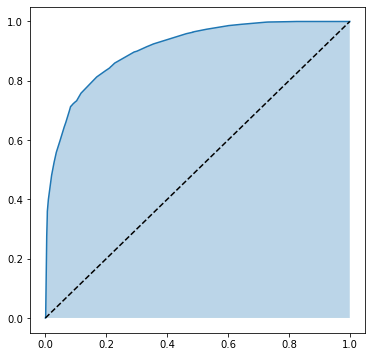

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_ts, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr,alpha=.3)
plt.plot((0, 1), (0, 1), 'k--')

In [48]:
roc_auc_score(y_ts, y_pred)

0.9077076863057042

### Ótimo score! Modelo está muito bom.

# Importância das variáveis
 Como queremos um modelo **explicativo** e queremos **entender nossos dados demográficos**, identificar a importância das variáveis na renda da nossa população pode ser muito oportuno

In [49]:
grid.best_estimator_.feature_importances_

array([0.0548852 , 0.00272908, 0.        , 0.        , 0.19336448,
       0.        , 0.01344149, 0.42552167, 0.        , 0.        ,
       0.20294448, 0.06741535, 0.03969826, 0.        ])

In [50]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [52]:
importancias = grid.best_estimator_.feature_importances_
ordem = np.argsort(importancias)[::-1]
colunas = X.columns

for col,imp in zip(colunas[ordem],importancias[ordem]):
    print(f'{col:30s}{imp:.3f}')

relationship                  0.426
capital-gain                  0.203
education-num                 0.193
capital-loss                  0.067
age                           0.055
hours-per-week                0.040
occupation                    0.013
workclass                     0.003
native-country                0.000
sex                           0.000
race                          0.000
marital-status                0.000
education                     0.000
fnlwgt                        0.000


## Assim, temos que as três variáveis mais importantes para determinar se uma pessoa tem ou não uma renda maior que 50.000 reais, para o nosso modelo, são:
### 1- 'relationship': o tipo de relacionamento em que ela se encontra (se é marido, esposa, tem ou não filhos etc).
### 2- 'capital-gain': o ganho de capital (valor contínuo).
### 3-'education-num': nível de educação da pessoa (métrica utilizada para classificação desconhecida).